# Accuracy isn't everything

The following simple ODE uncovers a surprise.

In [1]:
using FundamentalsNumericalComputation

In [2]:
ivp = ODEProblem((u,p,t)->u^2-u^3, 0.005, (0,400.))

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 400.0)
u0: 0.005

We will solve the problem first with the implicit AM2 method using $n=200$ steps.

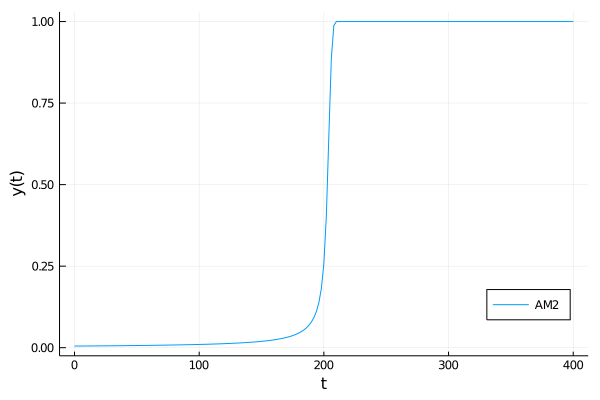

In [3]:
tI,uI = FNC.am2(ivp,200)

plot(tI,uI,label="AM2",xlabel="t",ylabel="y(t)",leg=:bottomright)

Now we repeat the process using the explicit AB4 method.

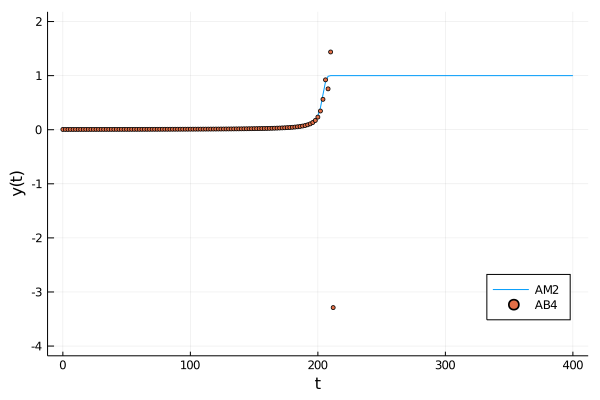

In [4]:
tE,uE = FNC.ab4(ivp,200)

scatter!(tE,uE,m=3,label="AB4",ylim=[-4,2])

Once the solution starts to take off, the AB4 result goes catastrophically wrong.

In [5]:
uE[105:111]

7-element Array{Float64,1}:
   0.7553857798343923
   1.4372970308402562
  -3.2889768512289934
 214.1791132643978
  -4.482089146771584e7
   4.1268902909420876e23
  -3.221441244795439e71

We hope that AB4 will converge in the limit $h\to 0$, so let's try using more steps.

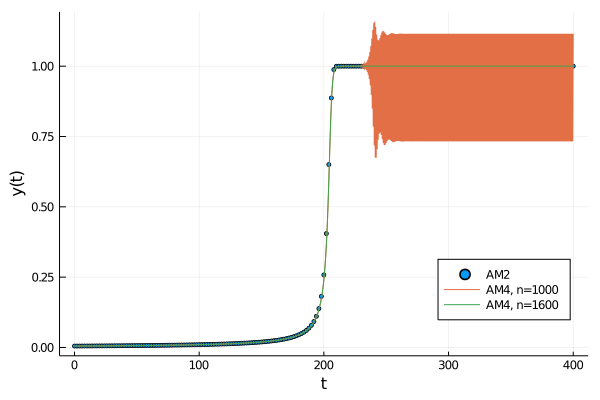

In [6]:
plt = scatter(tI,uI,label="AM2",m=3,xlabel="t",ylabel="y(t)",leg=:bottomright)

for n = [1000,1600]
    tE,uE = FNC.ab4(ivp,n);
    plot!(tE,uE,label="AM4, n=$n")
end
display(plt)

So AB4, which is supposed to be _more_ accurate than AM2, actually needs something like 8 times as many steps to get a reasonable-looking answer!